# Introdução

O dataset "Customer Shopping Trends" visa permitir encontrar padrões de consumo e comportamento do consumidor a partir de diferentes atributos que dizem respeito às características dos indivíduos e de suas compras passadas e presentes. Aqui, busca-se realizar uma análise exploratória de dados a fim de testar as habilidades de tratamento e visualização dos mesmos com as bibliotecas Numpy, Pandas, Matplotlib, Seaborn e Plotly. O objetivo é criar um perfil do cliente e um parâmetro de desempenho da rede de lojas. 

Vale salientar que o dataset foi criado artificialmente e encontrado no Kaggle, de modo que a validade dos seus valores - como irá se perceber - é limitada. Ele pode ser encontrado a partir do link: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/discussion

Glossário das variáveis

- Customer ID: identificador único de cada consumidor
- Age: idade do consumidor
- Gender: gênero do consumidor
- Item Purchased: item comprado pelo consumidor
- Category: categoria do item comprado
- Purchase Amount (USD): o valor da compra em dólares
- Location: localização da loja onde a compra foi realizada
- Size: tamanho da compra feita
- Color: cor do item comprado
- Season: estação na qual a compra foi feita
- Review Rating: avaliação dada pelo consumidor sobre o produto comprado
- Subscription Status: indica se o consumidor tem cadastro na loja ou não
- Shipping Type: tipo de pagamento realizado
- Discount Applied: indica se houve desconto na compra
- Promo Code Used: indica se um código promocional foi utilizado
- Previous Purchases: quantidade total de transações concluídas, excluída a em andamento
- Payment Method: método de pagamento preferido do cliente
- Frequency of Purchases: frequência com a qual o cliente compra na loja

In [1]:
# Biblioteca para processamento de dados
import numpy as np
import pandas as pd

# Biblioteca para visualização de dados e estilizações
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 8
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py

# Proibição de aviso de erros
import warnings
warnings.filterwarnings('ignore')

# Mostrar até 15 linhas do DataFrame
pd.set_option('display.max_rows', 15)

# Mostrar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

Importando o dataset:

In [2]:
df = pd.read_csv("C:\\Users\\iksil\\OneDrive\\Área de Trabalho\\Cursos\\Customer Shopping Trends\\shopping_trends_updated.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Olhando as informações gerais:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
f'O conjunto de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas. Isto é, ele tem dados de {df.shape[0]} clientes.'

'O conjunto de dados tem 3900 linhas e 18 colunas. Isto é, ele tem dados de 3900 clientes.'

Checando se existem células nulas e duplicadas:

In [5]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
                         ..
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Length: 18, dtype: int64

In [6]:
df.duplicated().sum()

0

Retirando os espaços dos nomes das variáveis (colunas) a fim de facilitar a digitação dos códigos:

In [7]:
df.rename(columns = {'Item Purchased': 'Item_Purchased', 'Purchase Amount (USD)': 'Purchase_Amount(USD)',\
                    'Review Rating': 'Review_Rating', 'Subscription Status': 'Subscription_Status',\
                    'Shipping Type': 'Shipping_Type', 'Discount Applied': 'Discount_Applied',\
                    'Promo Code Used': 'Promo_Code_Used', 'Previous Purchases': 'Previous_Purchases',\
                    'Payment Method': 'Payment_Method', 'Frequency of Purchases': 'Frequency_of_Purchases'},\
          inplace = True)

# Análise exploratória de dados

Separando as variáveis em categóricas e numéricas:

In [8]:
variaveis_categoricas = df.select_dtypes(include = 'object').columns.tolist()
variaveis_numericas = df.select_dtypes(exclude = 'object').columns.tolist()
f'As variáveis categóricas são {len(variaveis_categoricas)}. Elas são: {variaveis_categoricas}. \
As variáveis numéricas são {len(variaveis_numericas)}. São elas: {variaveis_numericas}.'

"As variáveis categóricas são 13. Elas são: ['Gender', 'Item_Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription_Status', 'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used', 'Payment_Method', 'Frequency_of_Purchases']. As variáveis numéricas são 5. São elas: ['Customer ID', 'Age', 'Purchase_Amount(USD)', 'Review_Rating', 'Previous_Purchases']."

Olhando, primeiro, para a divisão dos indivíduos da amostra entre gênero:

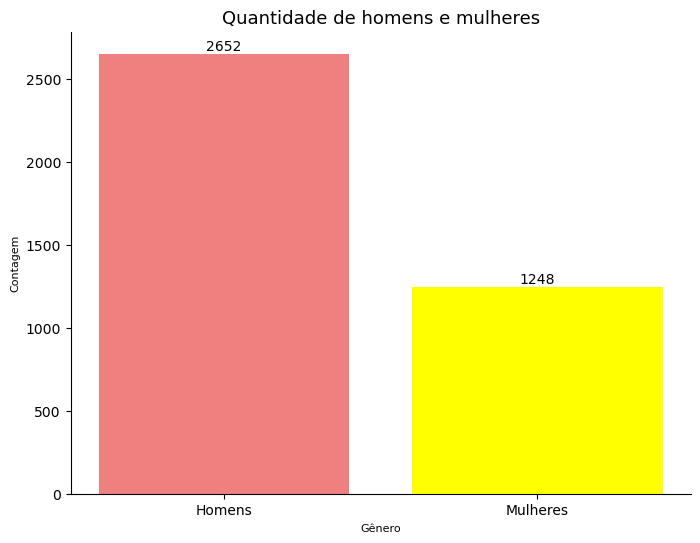

In [10]:
# Criação da moldura da figura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico de barras
ax.bar(x = df['Gender'].value_counts().index, 
       height = df['Gender'].value_counts().values, 
       color = ['lightcoral', 'yellow'])

# Legendas e estilizações
ax.set_title('Quantidade de homens e mulheres')
ax.set_xlabel('Gênero')
ax.set_ylabel('Contagem')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Homens', 'Mulheres'])
for i, v in enumerate(df['Gender'].value_counts().values):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

Vê-se que existem mais que o dobro de homens em relação ao número de mulheres entre os clientes da amostra.

A fim de entender o perfil dos clientes, procura-se saber quem tem cadastro na lojas:

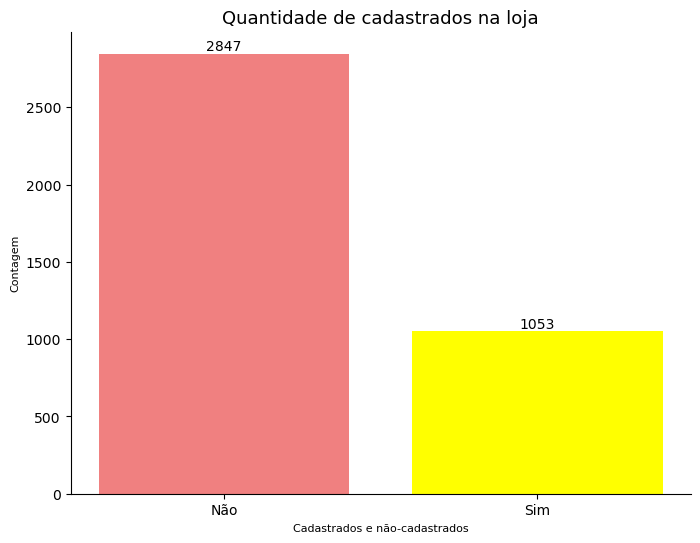

In [11]:
# Criação da moldura da figura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico de barras
ax.bar(x = df['Subscription_Status'].value_counts().index, 
       height = df['Subscription_Status'].value_counts().values, 
       color = ['lightcoral', 'yellow'])

# Legendas e estilizações
ax.set_title('Quantidade de cadastrados na loja')
ax.set_xlabel('Cadastrados e não-cadastrados')
ax.set_ylabel('Contagem')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Não', 'Sim'])
for i, v in enumerate(df['Subscription_Status'].value_counts().values):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

Nota-se que os indivíduos que não têm cadastro na loja são mais que o dobro daqueles que têm. Nesse contexto, é importante saber o gênero da maioria dos cadastrados e não-cadastrados:

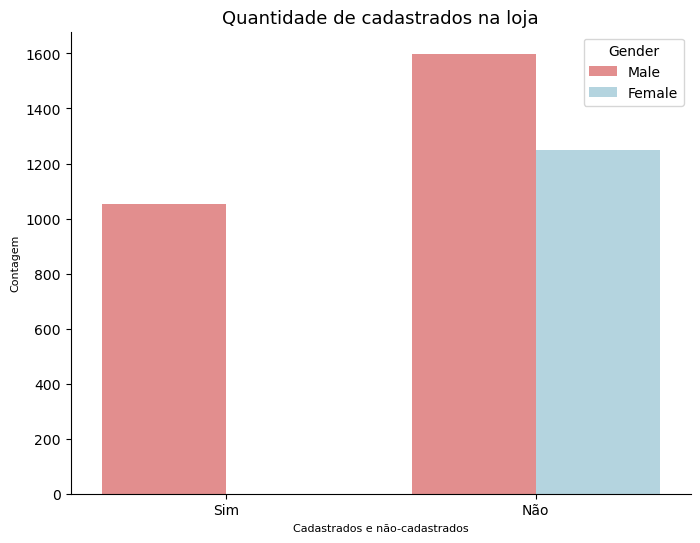

In [12]:
# Criação da moldura da figura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico de barras
sns.countplot(data = df, x = 'Subscription_Status', hue = 'Gender', palette = ['lightcoral', 'lightblue'])

# Legendas e estilizações
ax.set_title('Quantidade de cadastrados na loja')
ax.set_xlabel('Cadastrados e não-cadastrados')
ax.set_ylabel('Contagem')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Sim', 'Não'])

# Plotagem
plt.show()

Nenhuma mulher está cadastrada nas lojas. Pode-se supor que sejam todas lojas destinadas ao público masculino, mas, mesmo se o fosse, o número de homens não-cadastrados supera consideravelmente o número de homens cadastrados. Logo, torna-se interessante verificar a frequência na qual as mulheres e os homens compram nas lojas dessa rede: 

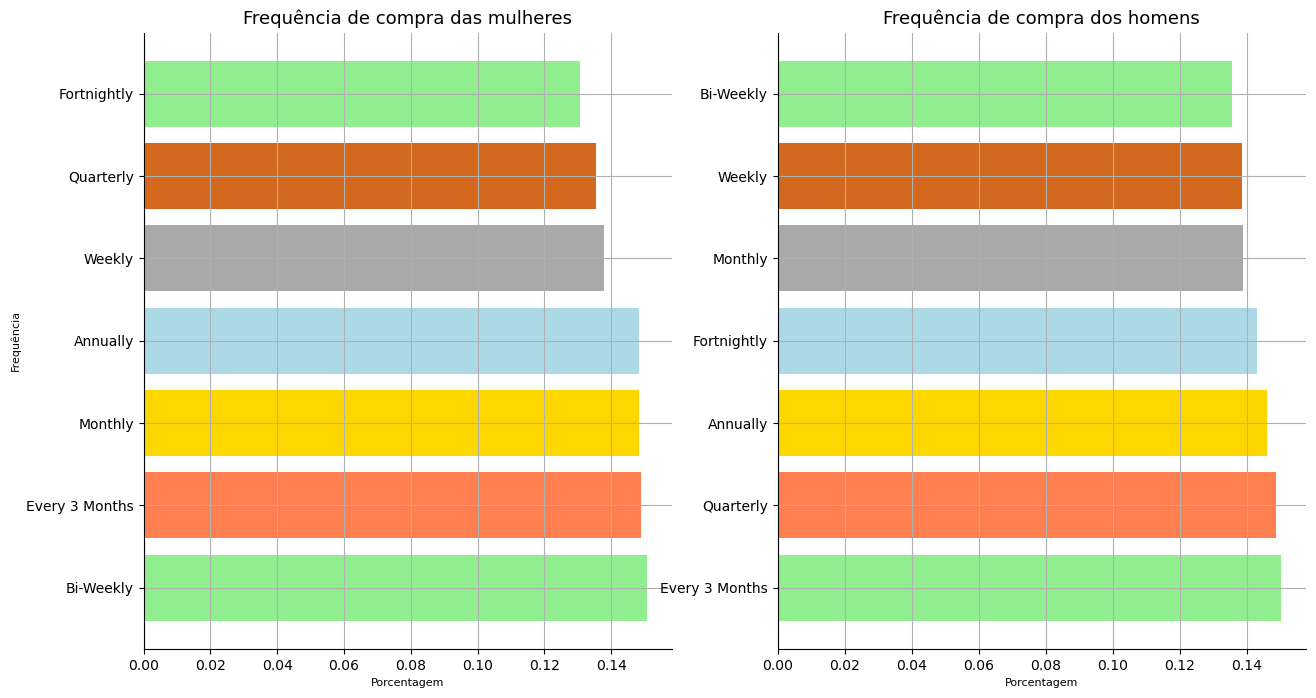

In [14]:
# Criação da moldura da figura
fig, ax = plt.subplots(1, 2, figsize = (15,8))

women_frequency_purchases = df.loc[df['Gender'] == 'Female']['Frequency_of_Purchases'].value_counts(1)
men_frequency_purchases = df.loc[df['Gender'] == 'Male']['Frequency_of_Purchases'].value_counts(1)
women_previous_purchases = df.loc[df['Gender'] == 'Female']['Previous_Purchases'].value_counts()
men_previous_purchases = df.loc[df['Gender'] == 'Male']['Previous_Purchases'].value_counts()

# Gráfico de barras 1
ax[0].barh(y = women_frequency_purchases.index, 
           width = women_frequency_purchases.values, 
           color = ['lightgreen', 'coral', 'gold', 'lightblue', 'darkgray', 'chocolate'])

# Legendas e estilizações
ax[0].set_title('Frequência de compra das mulheres')
ax[0].set_xlabel('Porcentagem')
ax[0].set_ylabel('Frequência')
ax[0].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Gráfico de barras 2
ax[1].barh(y = men_frequency_purchases.index, 
           width = men_frequency_purchases.values, 
           color = ['lightgreen', 'coral', 'gold', 'lightblue', 'darkgray', 'chocolate'])

# Legendas e estilizações
ax[1].set_title('Frequência de compra dos homens')
ax[1].set_xlabel('Porcentagem')

ax[1].grid(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Plotagem
plt.show()

Não parece ser uma loja somente destinada somente a homens já que quase metade do público feminino compra a cada duas semanas, mensalmente ou a cada 3 meses na loja. Os homens têm hábito de compras similares aos das mulheres, inclusive. Olhando, então, para o histórico do valor de compras realizadas anteriormente pelos gêneros:

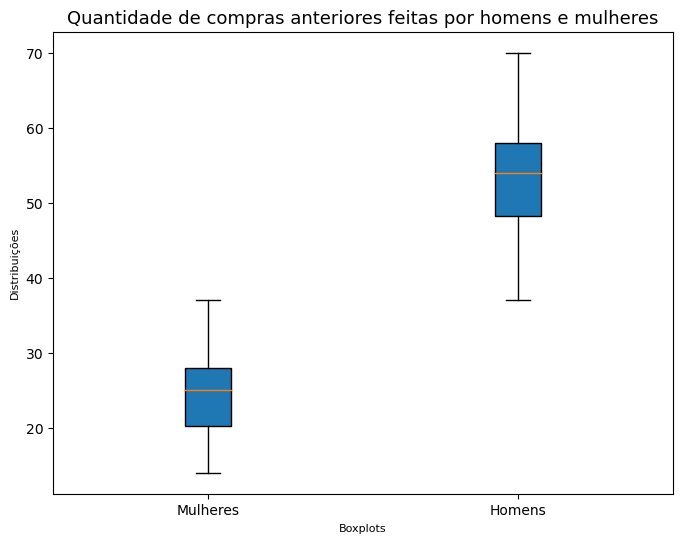

In [15]:
# Criação da moldura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico boxplot 3
ax.boxplot(x = [women_previous_purchases, men_previous_purchases], patch_artist = True)

# Legendas e estilizações
ax.set_title('Quantidade de compras anteriores feitas por homens e mulheres')
ax.set_xlabel('Boxplots')
ax.set_ylabel('Distribuições')
ax.set_xticklabels(['Mulheres', 'Homens'])

# Plotagem
plt.show()

Assim, vê-se que, apesar dos hábitos de consumo serem parecidos, elas compram menos em relação aos homens de acordo com o histórico.

In [17]:
from tabulate import tabulate 

desc1 = women_previous_purchases.describe()
desc1 = pd.DataFrame(desc1)
print('Distribuição do histórico de compras para as mulheres:')
print(tabulate(desc1, headers = 'keys', tablefmt = 'psql', showindex = True))

desc2 = men_previous_purchases.describe()
desc2 = pd.DataFrame(desc2)
print('Distribuição do histórico de compras para os homens:')
print(tabulate(desc2, headers = 'keys', tablefmt = 'psql', showindex = True))

Distribuição do histórico de compras para as mulheres:
+-------+----------+
|       |    count |
|-------+----------|
| count | 50       |
| mean  | 24.96    |
| std   |  5.72485 |
| min   | 14       |
| 25%   | 20.25    |
| 50%   | 25       |
| 75%   | 28       |
| max   | 37       |
+-------+----------+
Distribuição do histórico de compras para os homens:
+-------+----------+
|       |    count |
|-------+----------|
| count | 50       |
| mean  | 53.04    |
| std   |  7.95385 |
| min   | 37       |
| 25%   | 48.25    |
| 50%   | 54       |
| 75%   | 58       |
| max   | 70       |
+-------+----------+


A média de compras feitas anteriormente pelas mulheres é de, aproximadamente, 25 compras, com um desvio-padrão de, aproximadamente, 6 compras a mais ou a menos. Além disso, 50% das mulheres fizeram entre 14 e 28 compras anteriores. Já os homens, eles de fato apresentam uma média alta de, aproximadamente, 53 compras anteriores, um histórico mínimo de 37 compras e atingem, até mesmo, o máximo de 70 compras anteriores.

O que os públicos feminino e masculino, então, compram?

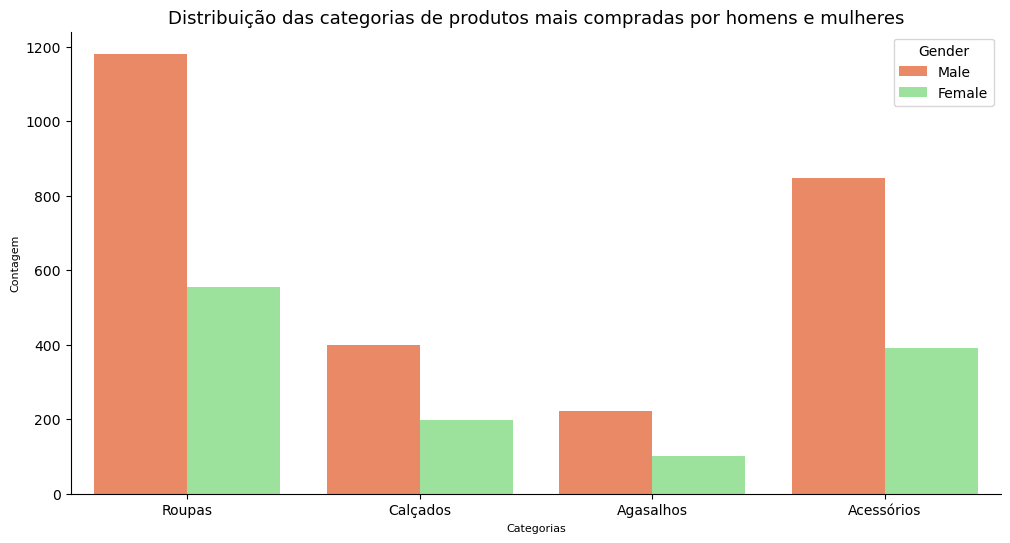

In [18]:
# Criação da moldura da imagem
fig, ax = plt.subplots(figsize = (12,6))

# Gráfico de barras
sns.countplot(data = df, 
              x = 'Category', 
              hue = 'Gender', 
              palette = ['coral', 'lightgreen'])

# Legendas e estilizações
ax.set_title('Distribuição das categorias de produtos mais compradas por homens e mulheres')
ax.set_xlabel('Categorias')
ax.set_ylabel('Contagem')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Roupas', 'Calçados', 'Agasalhos', 'Acessórios'])

# Plotagem
plt.show()

Percebe-se que o perfil dos clientes, apesar do gênero, da diferença em números absolutos e, possivelmente, das mudanças nas prioridades de itens comprados, é parecido no que diz respeito à procura majoritária por itens da categoria 'Roupas' e 'Calçados'. Logo, existe possibilidade real da loja aumentar ainda mais a fidelidade do público feminino ao estimular o cadastro desse grupo. 

Uma das ferramentas que poderiam ser utilizadas a fim de conseguir essa adesão é dar descontos à esse grupo focal mediante cadastro. Verificando como eles são aplicados, conforme o gênero:

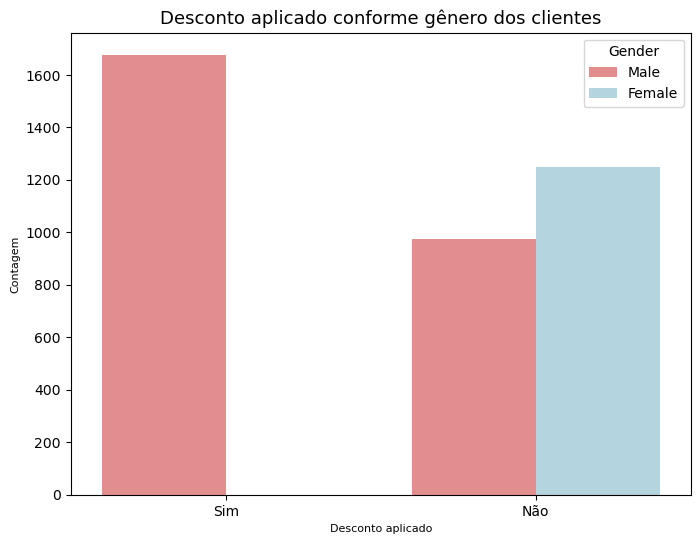

In [19]:
# Criação da moldura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico de barras
sns.countplot(data = df, x = 'Discount_Applied', hue = 'Gender', palette = ['lightcoral', 'lightblue'])

# Legendas e estilizações
ax.set_title('Desconto aplicado conforme gênero dos clientes')
ax.set_xlabel('Desconto aplicado')
ax.set_ylabel('Contagem')
ax.set_xticklabels(['Sim', 'Não'])

# Plotagem
plt.show()

Nota-se que a política de descontos favorece, unicamente, uma parcela dos clientes homens. Conferindo se eles estão cadastrados de fato:

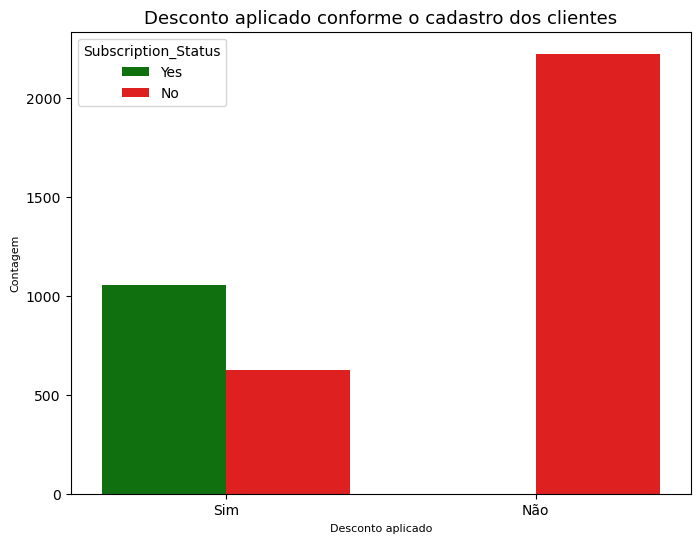

In [20]:
# Criação da moldura
fig, ax = plt.subplots(figsize = (8,6))

# Gráfico de barras
sns.countplot(data = df, x = 'Discount_Applied', hue = 'Subscription_Status', palette = ['green', 'red'])

# Legendas e estilizações
ax.set_title('Desconto aplicado conforme o cadastro dos clientes')
ax.set_xlabel('Desconto aplicado')
ax.set_ylabel('Contagem')
ax.set_xticklabels(['Sim', 'Não'])

# Plotagem
plt.show()

Apenas parcela dos clientes homens tem desconto. Contudo, o público feminino não é contemplado nos descontos aplicados pelas lojas. Focar nesse grupo de clientes poderia ajudar a aumentar as vendas e, consequentemente, a fidelidade dessas clientes.

Voltando a atenção para a rede de loja, interessa saber quais lojas vendem mais e quais vendem menos, em média:

In [27]:
# Criação de um DataFrame que separa a soma das compras anteriores por localidade
location_previous_purchases = df.groupby('Location')['Previous_Purchases'].mean().round().reset_index()

# Alteração da ordem para mostrar os maiores valores dos 10 primeiros
location_previous_purchases = location_previous_purchases.sort_values('Previous_Purchases', ascending = False)[:10]

# Renomeação de suas colunas
location_previous_purchases.columns = ['Localização', 'Histórico de vendas médio']

# Plotagem
print('As 10 lojas com o melhor histórico de vendas:')
print(location_previous_purchases)

As 10 lojas com o melhor histórico de vendas:
      Localização  Histórico de vendas médio
10         Hawaii                       29.0
49        Wyoming                       28.0
2         Arizona                       28.0
1          Alaska                       28.0
24       Missouri                       28.0
14           Iowa                       28.0
12       Illinois                       27.0
43           Utah                       27.0
37   Pennsylvania                       27.0
28  New Hampshire                       27.0


A média do histórico de compras mostra que a loja do Havaí tem a melhor média, mas é importante salientar que a décima melhor, a loja de New Hampshire, tem uma média próxima, o que denota que existe pouca variabilidade dentro desse top 10.

In [28]:
# Criação de um DataFrame que separa a soma das compras anteriores por localidade
location_previous_purchases = df.groupby('Location')['Previous_Purchases'].mean().round().reset_index()

# Alteração da ordem para mostrar os menores valores dos 10 primeiros
location_previous_purchases = location_previous_purchases.sort_values('Previous_Purchases', ascending = True)[:10]
location_previous_purchases = location_previous_purchases.sort_values('Previous_Purchases', ascending = False)[:10]

# Renomeação de suas colunas
location_previous_purchases.columns = ['Localização', 'Histórico de vendas médio']

# Plotagem
print('As 10 lojas com o pior histórico de vendas:')
print(location_previous_purchases)

As 10 lojas com o pior histórico de vendas:
      Localização  Histórico de vendas médio
11          Idaho                       24.0
45       Virginia                       24.0
33   North Dakota                       24.0
18          Maine                       23.0
17      Louisiana                       23.0
48      Wisconsin                       23.0
35       Oklahoma                       23.0
20  Massachusetts                       23.0
15         Kansas                       23.0
42          Texas                       21.0


A baixa variabilidade se repete aqui. A pior média é da loja do Texas, mas ela está próxima da média de Rhode Island.

Buscando, agora, em quais estações se vende, em média, mais:

In [31]:
# Criação de um DataFrame que relacione a média do histórico de vendas com a estação do ano
mean_season_purchases = df.groupby('Season')['Previous_Purchases'].mean().round().reset_index()

# Ordenação conforme o histórico de vendas
mean_season_purchases = mean_season_purchases.sort_values('Previous_Purchases', ascending = False)

# Alteração dos nomes das colunas
mean_season_purchases.columns = ['Estação do ano', 'Histórico de vendas médio']

# Plotagem
print('Histórico de vendas por estação:')
print(mean_season_purchases)

Histórico de vendas por estação:
  Estação do ano  Histórico de vendas médio
3         Winter                       26.0
0           Fall                       25.0
1         Spring                       25.0
2         Summer                       25.0


Não existe uma estação na qual se vende em média mais com muito destaque. O inverno é a estação que apresenta maior histórico médio de vendas, mas as outras três (outono, primavera e verão) apresentam, aproximadamente, a mesma.

Vale, agora, olhar para mais variáveis numéricas. É interessante ver a quantidade de dinheiro que é gasto por compra nessa rede de lojas:

In [35]:
df['Purchase_Amount(USD)'].describe().round(3).reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Purchase_Amount(USD),3900.0,59.764,23.685,20.0,39.0,60.0,81.0,100.0


A média de valor gasto nas compras na rede de lojas é de, aproximadamente, 60 dólares. Além disso, a maioria dos clientes da amostra gastaram entre 39 dólares e 81 dólares, e o menor e maior valor gastos e noticiados foram de 20 e 100 dólares, respectivamente.

A partir disso, busca-se correlações possíveis entre as variáveis numéricas:

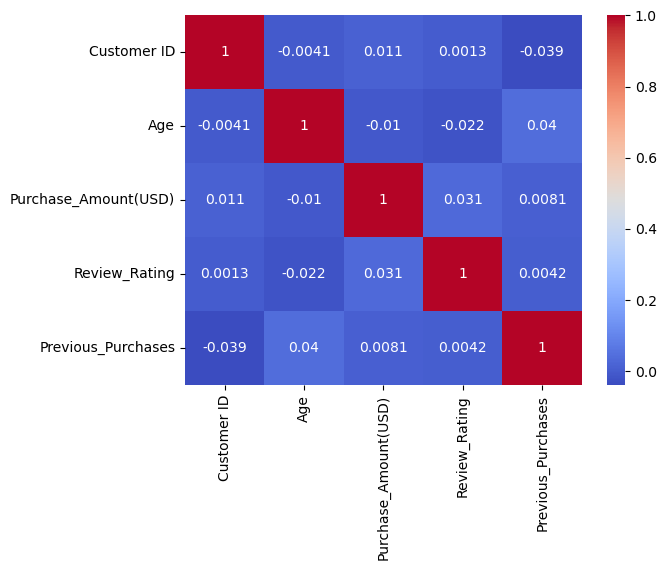

In [36]:
# Destaque das variáveis numéricas
numericas = df[['Customer ID', 'Age', 'Purchase_Amount(USD)', 'Review_Rating', 'Previous_Purchases']]

# Realização das correlações
numericas_corr = numericas.corr()

# Criação de uma matriz para representação
sns.heatmap(numericas_corr, annot = True, cmap = 'coolwarm')

# Plotagem
plt.show()

As variáveis numéricas do dataset não possibilitam o avanço da análise pois suas correlações são muito fracas.

# Conclusões

- A maioria dos clientes da amostra são homens.
- A maioria dos clientes não são cadastrados na rede de lojas, mas aqueles cadastrados são homens.
- Mesmo assim, os hábitos de compra dos dois gêneros é similar, focados em 'Roupas' e 'Calçados', embora os homens têm um histórico de compras maior.
- Ainda assim, quando os descontos são aplicados, eles acabam sendo aplicados tão somente ao público masculino, mesmo quando eles não têm cadastro na rede de lojas. Um insight possível, a partir disso, é a criação de estratégias de vendas que instiguem o público feminino a se fidelizar à loja, como, por exemplo, com descontos exclusivos em peças femininas.  
- A loja do Havaí é a que tem o melhor histórico de quantidades médias vendidas e a loja do Texas tem o pior, e a diferença entre eles é de 9 compras.
- As estações do ano não parecem influenciar esse mesmo histórico de vendas médio.
- As compras documentadas pelo dataset tinham, em média, o valor de 60 dólares, e a maioria dos clientes gastaram entre 39 e 81 dólares.  